Final DataSet:  (6010, 800)
i: 0 cost: 858.052016356 error: 0.538269550749
i: 100 cost: 594.480454491 error: 0.177204658902
i: 200 cost: 563.976126777 error: 0.171381031614
i: 300 cost: 546.173138345 error: 0.158069883527
i: 400 cost: 524.031671841 error: 0.167221297837
best_validation_error: 0.158069883527


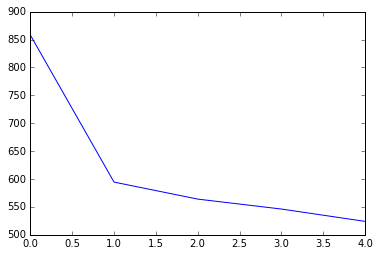

i: 0 cost: 821.522610978 error: 0.52079002079
i: 100 cost: 512.055752901 error: 0.211018711019
i: 200 cost: 481.542515252 error: 0.180873180873
i: 300 cost: 468.829031486 error: 0.189189189189
i: 400 cost: 473.465792396 error: 0.176715176715
best_validation_error: 0.176715176715
i: 0 cost: 776.519872445 error: 0.535343035343
i: 100 cost: 480.307991104 error: 0.212058212058
i: 200 cost: 467.140597238 error: 0.190228690229
i: 300 cost: 458.344846903 error: 0.18814968815
i: 400 cost: 458.834307944 error: 0.185031185031
best_validation_error: 0.185031185031
i: 0 cost: 738.966687405 error: 0.648648648649
i: 100 cost: 573.141750937 error: 0.241164241164
i: 200 cost: 557.764935301 error: 0.212058212058
i: 300 cost: 537.823768738 error: 0.198544698545
i: 400 cost: 526.126758199 error: 0.199584199584
best_validation_error: 0.198544698545
i: 0 cost: 669.43644243 error: 0.438669438669
i: 100 cost: 474.288688406 error: 0.201663201663
i: 200 cost: 453.985534249 error: 0.180873180873
i: 300 cost: 44

In [3]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate, relu, crossValidation
%matplotlib inline

class ANN(object):
    """
    ANN: a simple neural network with one hidden layer, take input for # of hidden units
    """
    def __init__(self, M):
        self.M = M

    def fit(self, X, Y, learning_rate=8*10e-9, reg=1.0, epochs=500, show_fig=False):
        X, Y = shuffle(X, Y)
        
        N, D = X.shape
        Ntrain=int(N*0.8)
        
        Xvalid, Yvalid = X[Ntrain:], Y[Ntrain:]
        X, Y = X[:Ntrain], Y[:Ntrain]
        
        
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M) / np.sqrt(self.M)
        self.b2 = 0

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            pY, Z = self.forward(X)

            # gradient descent step
            pY_Y = pY - Y
            self.W2 -= learning_rate*(Z.T.dot(pY_Y) + reg*self.W2)
            self.b2 -= learning_rate*((pY_Y).sum() + reg*self.b2)

            # print "(pY_Y).dot(self.W2.T) shape:", (pY_Y).dot(self.W2.T).shape
            # print "Z shape:", Z.shape
            # dZ = np.outer(pY_Y, self.W2) * (Z > 0) for ReLU 
            dZ = np.outer(pY_Y, self.W2) * (1 - Z*Z)
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(np.sum(dZ, axis=0) + reg*self.b1)

            if i % 100 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        # Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return sigmoid(Z.dot(self.W2) + self.b2), Z


    def predict(self, X):
        pY, _ = self.forward(X)
        return np.round(pY)


    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)


def main():
    
    X, Y = getBinaryData()

    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 2, axis=0)
    X = np.vstack([X0, X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))
    
    print ("Final DataSet: ", X.shape)
    

    model = ANN(550) #100 hidden units 
    model.fit(X, Y, show_fig=True)
    
    scores = crossValidation(model, X, Y, K=5)
    print ("Cross_Validaton Accuracy -- mean:", np.mean(scores), "stdev:", np.std(scores))

if __name__ == '__main__':
    main()
